# Libraries and dataset import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

from FW_recc import *

In [ ]:
# Dataset available at https://grouplens.org/datasets/movielens/
data = pd.read_csv("ratings.csv", sep = ",")

# short EDA and pre-processing

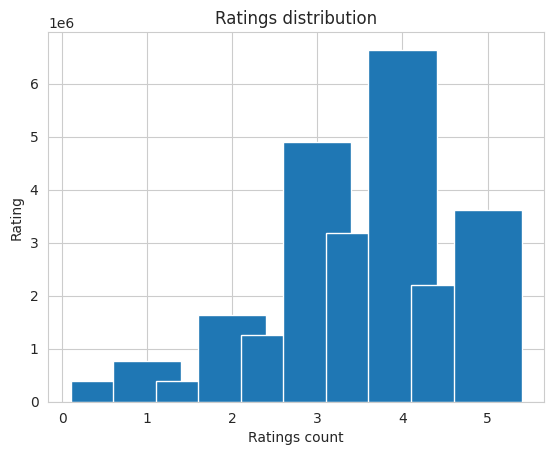

In [3]:
rating_groups = data.groupby("rating")["rating"].agg("count")

plt.bar(rating_groups.index, rating_groups.values)
plt.title("Ratings distribution")
plt.xlabel("Ratings count")
plt.ylabel("Rating")
plt.show()

In [4]:
item_count = data["movieId"].unique().shape[0]
user_count = data["userId"].unique().shape[0]

print("total movies: {}\ntotal users: {}".format(item_count, user_count))

total movies: 59047
total users: 162541


In [5]:
nan_values = data.isna().sum().sum()

if nan_values: print("NaN values count: {}".format(nan_values))
else: print("No NaN values found")

No NaN values found


In [6]:
# Compute the counts
data["movieId_count"] = data.groupby("movieId")["movieId"].transform("count")
data["userId_count"] = data.groupby("userId")["userId"].transform("count")

# Select the top movies and the most active users
movie_quantile = 0.50
user_quantile = 0.93

# Compute the quantiles
movie_threshold = data["movieId_count"].quantile(movie_quantile)
user_threshold = data["userId_count"].quantile(user_quantile)

# Filter the DataFrame using query for efficiency and readability
filtered_data = data[(data["movieId_count"] >= movie_threshold) & (data["userId_count"] >= user_threshold)]
R = pd.pivot_table(filtered_data, values = "rating", index = "userId", columns = "movieId").values

# Replace NaN values with zero
R[np.isnan(R)] = 0

In [7]:
print("Top {} % Users count: {}\nTop {} % movies count: {} ".format(int(user_quantile * 100),
                                                        R.shape[0],
                                                        int(movie_quantile * 100),
                                                        R.shape[1]))

Top 93 % Users count: 704
Top 50 % movies count: 654 


In [8]:
sparsity = (R == 0).sum() / (R.shape[0] * R.shape[1])

print("Sparsity: {} %".format(round(sparsity * 100, 2)))

Sparsity: 28.83 %


# Algorithms' test

In [9]:
epochs = 100
ball_radius = 10000

P_1, losses_1, gaps_1 = Frank_Wolfe(R,
                     epochs = epochs,
                     ball_radius = ball_radius,
                     f_loss = f_loss,
                     gradient = gradient,
                     verbose = True)

Epoch 100, Loss: 1.5090128195717336

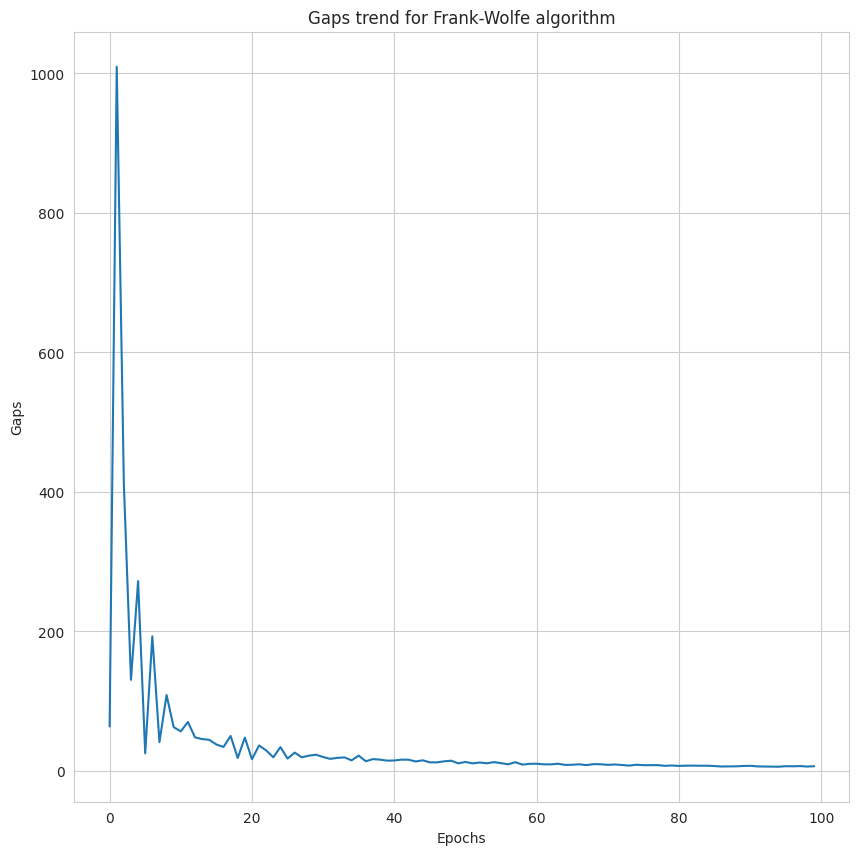

In [10]:
plt.figure(figsize = (10, 10))
plt.plot(gaps_1)

plt.title("Gaps trend for Frank-Wolfe algorithm")
plt.xlabel("Epochs")
plt.ylabel("Gaps")
plt.show()

In [11]:
epochs = 100
ball_radius = 10000

P_2, losses_2, gaps_2 = away_steps_FW(R,
                     epochs = epochs,
                     ball_radius = ball_radius,
                     f_loss = f_loss,
                     gradient = gradient,
                     verbose = True)

Epoch 100, Loss: 1.2551416047416535

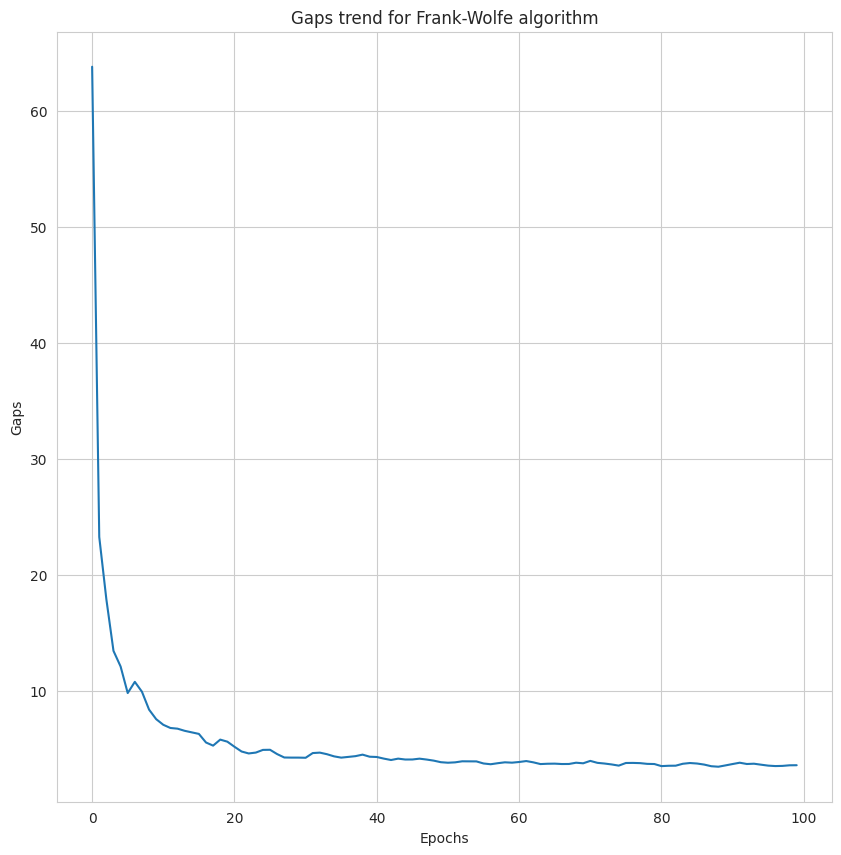

In [12]:
plt.figure(figsize = (10, 10))
plt.plot(gaps_2)

plt.title("Gaps trend for Frank-Wolfe algorithm")
plt.xlabel("Epochs")
plt.ylabel("Gaps")
plt.show()

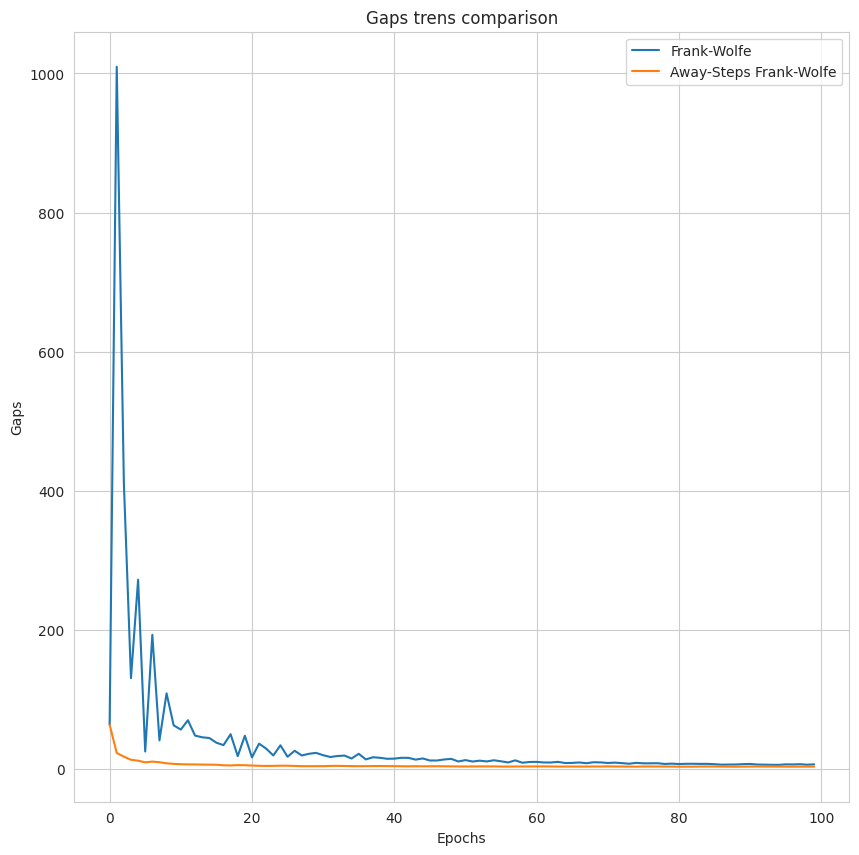

In [13]:
plt.figure(figsize = (10, 10))
plt.plot(gaps_1, label = "Frank-Wolfe")
plt.plot(gaps_2, label = "Away-Steps Frank-Wolfe")

plt.title("Gaps trens comparison")
plt.xlabel("Epochs")
plt.ylabel("Gaps")
plt.legend()
plt.show()